## IMPORTS

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [9]:
df = pd.read_parquet("D:/ML-End-to-End-Project/data/raw_data/raw_data_full.parquet")

In [10]:
df.head()

,datetime,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Feature Description


- **id**: Time slot identifier (not related to time order)  
- **year**: Year (2011 or 2012)  
- **hour**: Hour of the day (0 to 23)  
- **season**: Season of the year  
  - 1 = Winter  
  - 2 = Spring  
  - 3 = Summer  
  - 4 = Autumn  
- **holiday**: Indicates if the day was a holiday (1 = Yes, 0 = No)  
- **workingday**: Indicates if the day was a working day (1 = Yes, 0 = No; excludes holidays and weekends)  
- **weather**: Weather condition category (1 to 4) from best to worst  
- **temp**: Temperature in degrees Celsius  
- **atemp**: Perceived (feels-like) temperature in degrees Celsius  
- **humidity**: Relative humidity (%)  
- **windspeed**: Wind speed (km/h)  
- **count** *(training set only)*: Total number of rentals during that time slot  
n that band that band

# Data Profiling

In [11]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)

# Target & feature Dependency Analysis

In [13]:
df.shape

(17379, 16)

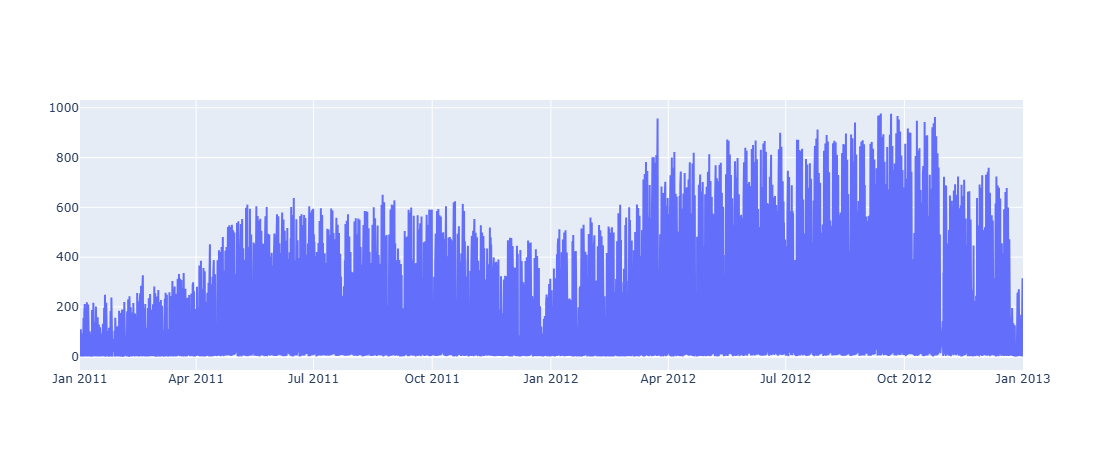

In [22]:
fig = go.Figure()

# Add Trace
fig.add_trace(go.Scatter(
    x = df["datetime"],
    y = df["cnt"],
    mode = "lines",
))

fig.update_layout(
    width = 1000,
    height = 450,
)
fig.show()

In [23]:
target_hr = df.groupby('hr')['cnt'].mean()

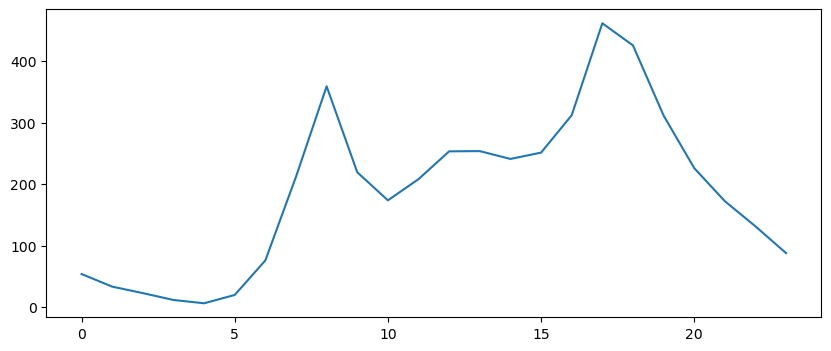

In [26]:
%matplotlib inline
plt.figure(figsize = (10,4))
plt.plot(target_hr)
plt.show()

# Re